## Observations and Insights 

In [2]:
%matplotlib inline

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice.
mice_number = combined_results["Mouse ID"].value_counts()
total_mice = len(mice_number)
total_mice

249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_results.loc[combined_results.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
duplicate_mice_id


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 

In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_cleaned = combined_results[combined_results["Mouse ID"].isin(duplicate_mice_id)==False]

In [27]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = combined_cleaned["Mouse ID"].value_counts()
new_total_mice = len(cleaned_mice)
new_total_mice

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_grouped = combined_cleaned.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = drug_grouped['Tumor Volume (mm3)'].mean()
tumor_median = drug_grouped['Tumor Volume (mm3)'].median()
tumor_variance = drug_grouped['Tumor Volume (mm3)'].var()
tumor_stddev = drug_grouped['Tumor Volume (mm3)'].std()
tumor_sem = drug_grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
statistics_df = pd.DataFrame({
    "Tumor Volume (mm3) Mean": tumor_mean,
    "Tumor Volume (mm3) Median": tumor_median,
    "Tumor Volume (mm3) Variance": tumor_variance,
    "Tumor Volume (mm3) Standard Deviation": tumor_stddev,
    "Tumor Volume (mm3) SEM": tumor_sem
})

statistics_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_df

# Using the aggregation method, produce the same summary statistics in a single line
statistics_agg = drug_grouped.agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Timepoints')

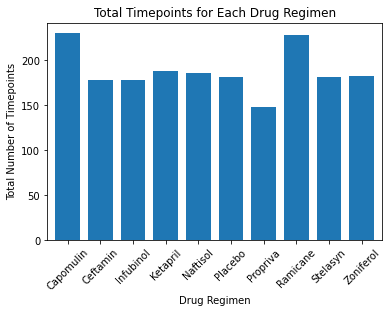

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas. 
## DataFrame.plot()
unique_drugs, ind = np.unique(combined_cleaned["Drug Regimen"].values,return_index=True)
y_values = drug_grouped['Timepoint'].count()
drugs_time_df = pd.DataFrame({
    'Drug Regimen': unique_drugs,
    'Timepoint': y_values})
time_chart1 = drugs_time_df.plot(kind="bar", x="Drug Regimen", y="Timepoint", title="Total Timepoints for Each Drug Regimen", legend = False, rot = 45, width=.75)

time_chart1.set_xlabel("Drug Regimen")
time_chart1.set_ylabel("Total Number of Timepoints")


Text(0, 0.5, 'Total Number of Timepoints')

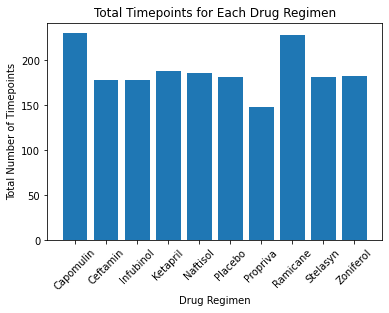

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
unique_drugs, ind = np.unique(combined_cleaned["Drug Regimen"].values,return_index=True)
x_axis = np.arange(len(unique_drugs))
y_values = drug_grouped['Timepoint'].count()
time_chart2 = plt.bar(x_axis, y_values)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, unique_drugs, rotation =45)


plt.title("Total Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")


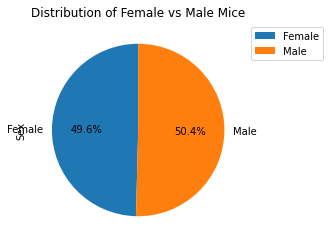

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_list, ind = np.unique(combined_cleaned["Sex"].values,return_index=True)
sex_grouped = combined_cleaned.drop_duplicates("Mouse ID")
sex_grouped = sex_grouped.groupby('Sex')
sex_count = sex_grouped['Sex'].value_counts()
sex_count_df = ({
    "Sex": sex_list,
    "Total":sex_count})
ax1 = plt.subplot(121, aspect='equal')
sex_chart1 = sex_count.plot(kind='pie', y = 'Sex', ax=ax1, autopct='%1.1f%%', title = "Distribution of Female vs Male Mice", startangle=90, shadow=False, labels=sex_count_df['Sex'], figsize=(8.5,8.5), legend = True).legend(bbox_to_anchor=(1,1))

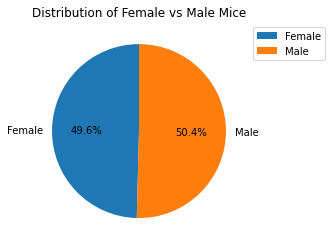

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_list, ind = np.unique(combined_cleaned["Sex"].values,return_index=True)
sex_grouped = combined_cleaned.drop_duplicates("Mouse ID")
sex_grouped = sex_grouped.groupby('Sex')
sex_count = sex_grouped['Sex'].value_counts()

sex_chart2 = plt.pie(sex_count, labels = sex_list, autopct='%1.1f%%', startangle=90,)
plt.title("Distribution of Female vs Male Mice")
plt.legend(bbox_to_anchor=(1,1))



## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

final_tumor = combined_cleaned.drop_duplicates(subset=['Mouse ID'], keep='last')
capomulin_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Capomulin"]
ramicane_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Ramicane"]
infubinol_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Infubinol"]
ceftamin_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Ceftamin"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
530,a577,Infubinol,Female,6,25,30,57.031862,2
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds

### Capomulin Drug Regimen

capomulin_tumor = capomulin_df["Tumor Volume (mm3)"]

quartiles = capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume under Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume under Capomulin  is: {upperq}")
print(f"The interquartile range of tumor volume under Capomulin  is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")   

The lower quartile of tumor volume under Capomulin is: 32.37735684
The upper quartile of tumor volume under Capomulin  is: 40.1592203
The interquartile range of tumor volume under Capomulin  is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [70]:
### Ramicane Drug Regimen

ramicane_tumor = ramicane_df["Tumor Volume (mm3)"]

quartiles = ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume under Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume under Capomulin  is: {upperq}")
print(f"The interquartile range of tumor volume under Capomulin  is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")   

The lower quartile of tumor volume under Capomulin is: 31.56046955
The upper quartile of tumor volume under Capomulin  is: 40.65900627
The interquartile range of tumor volume under Capomulin  is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [72]:
### Infubinol Drug Regimen

infubinol_tumor = infubinol_df["Tumor Volume (mm3)"]

quartiles = infubinol_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume under Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume under Capomulin  is: {upperq}")
print(f"The interquartile range of tumor volume under Capomulin  is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  

The lower quartile of tumor volume under Capomulin is: 54.04860769
The upper quartile of tumor volume under Capomulin  is: 65.52574285
The interquartile range of tumor volume under Capomulin  is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [73]:
### Ceftamin Drug Regimen

ceftamin_tumor = ceftamin_df["Tumor Volume (mm3)"]

quartiles = ceftamin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume under Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume under Capomulin  is: {upperq}")
print(f"The interquartile range of tumor volume under Capomulin  is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  

The lower quartile of tumor volume under Capomulin is: 48.72207785
The upper quartile of tumor volume under Capomulin  is: 64.29983003
The interquartile range of tumor volume under Capomulin  is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

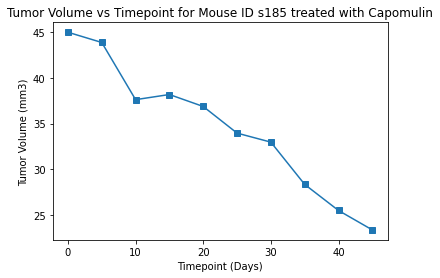

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = combined_cleaned[combined_cleaned['Drug Regimen'] == "Capomulin"]
capomulin.head()
mouse_s185 = capomulin[capomulin['Mouse ID'] == "s185"]

x_axis = mouse_s185["Timepoint"]
points = mouse_s185["Tumor Volume (mm3)"]
s185_chart = plt.plot(x_axis,points, marker='s')

plt.title("Tumor Volume vs Timepoint for Mouse ID s185 treated with Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")




Text(0, 0.5, 'Tumor Volume (mm3)')

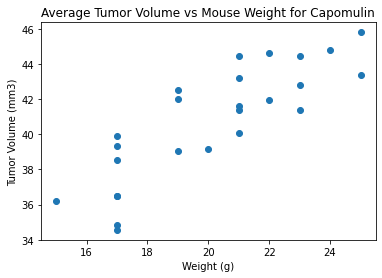

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_capomulin = capomulin.groupby('Mouse ID')
average_capomulin = grouped_capomulin.mean()
average_capomulin.head()

x_axis = average_capomulin['Weight (g)']
points = average_capomulin['Tumor Volume (mm3)']
weight_tumor_chart = plt.scatter(x_axis,points)

plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
grouped_capomulin = capomulin.groupby('Mouse ID')
average_capomulin = grouped_capomulin.mean()

weight = average_capomulin['Weight (g)']
avg_tumor_volume = average_capomulin['Tumor Volume (mm3)']

correlation = st.pearsonr(weight,avg_tumor_volume)

print(f"The correlation between weight and average tumor volume for Capomulin regimen is {round(correlation[0],2)}")

The correlation between weight and average tumor volume for Capomulin regimen is 0.84


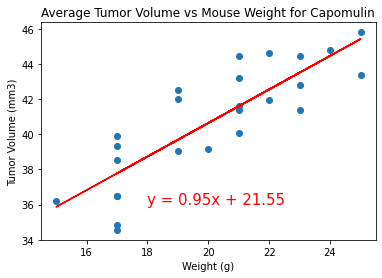

In [41]:
# Linear Regression Model
x_values = weight
y_values = avg_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()